In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('50_Startups.csv')

df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

In [4]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [5]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


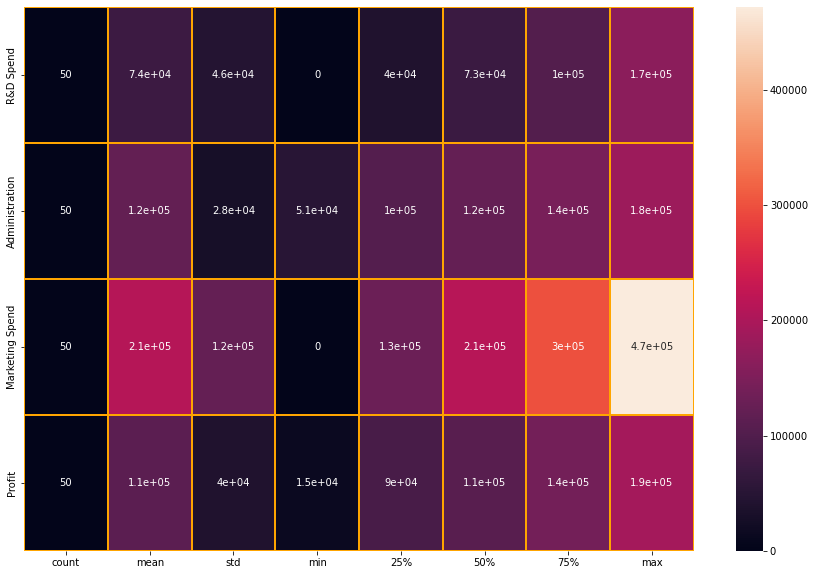

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.describe().T,annot=True,linewidths=2,linecolor='orange')
plt.show()

In [11]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<AxesSubplot:>

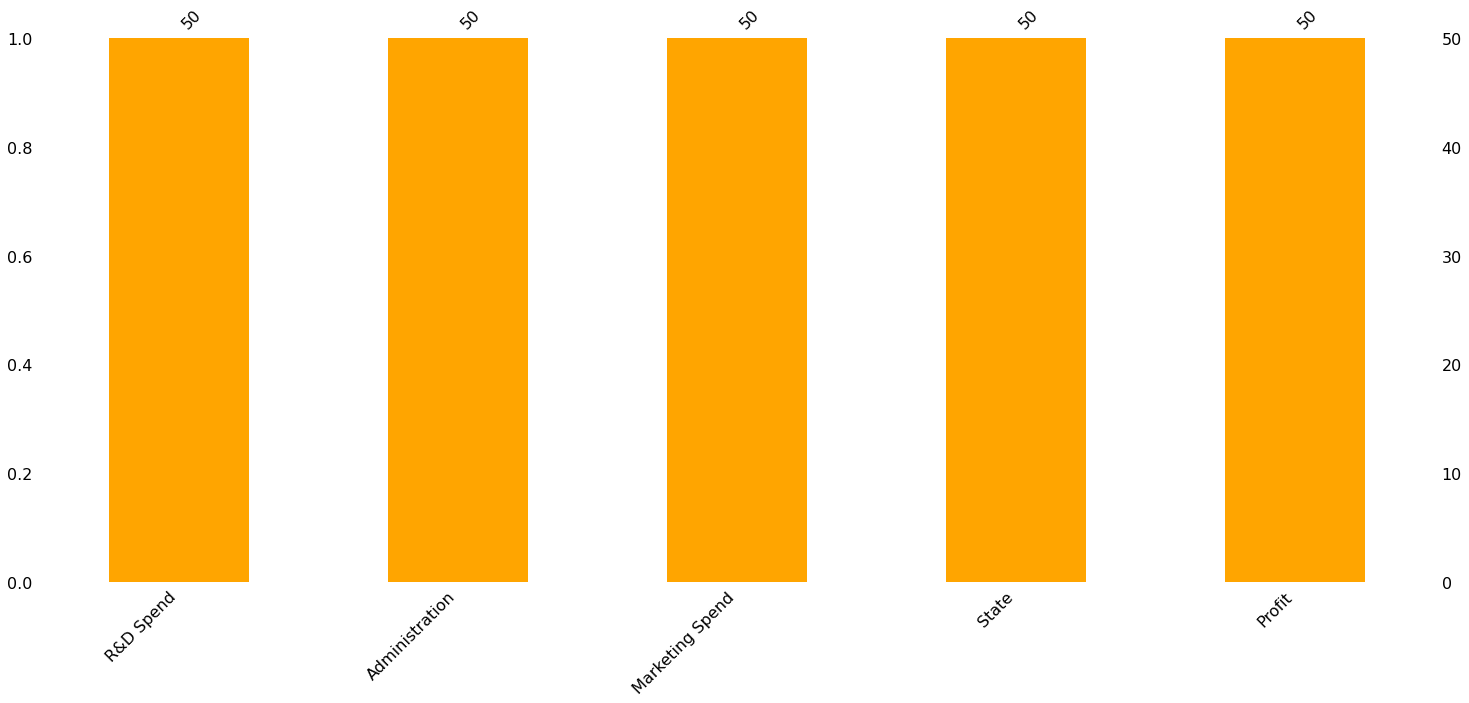

In [12]:
import missingno
missingno.bar(df,color='orange')

In [14]:
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

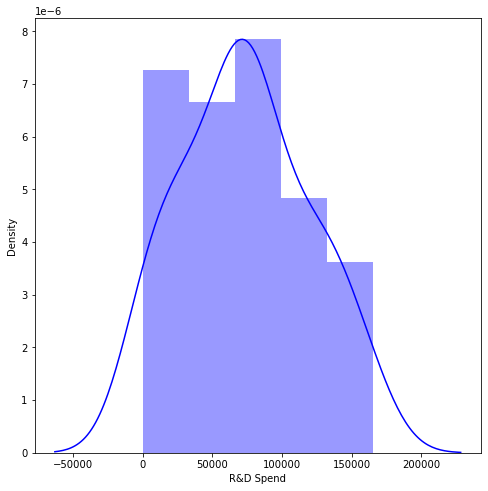

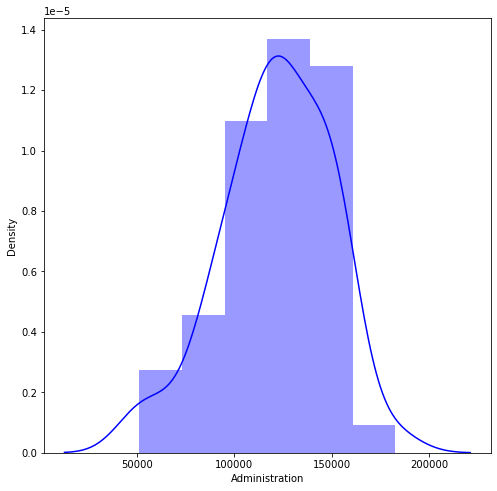

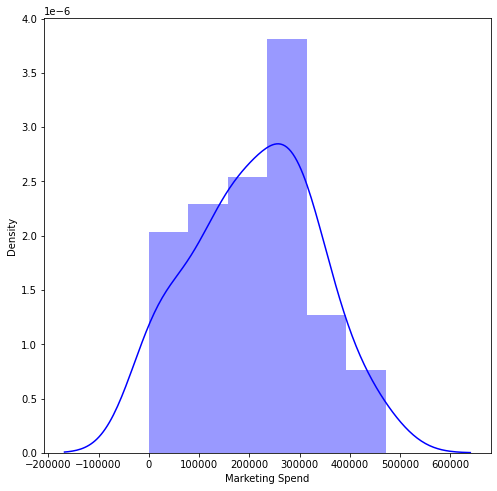

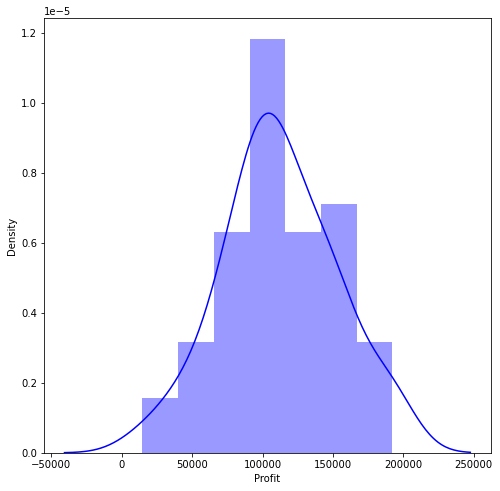

In [15]:
def distplot():
    for i in df.select_dtypes(include=['number']):
        plt.figure(figsize=(8,8))
        plot = sns.distplot(df[i],color='blue')
        plt.show()
distplot()

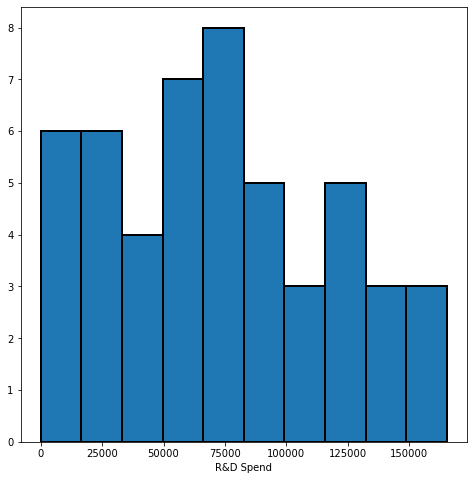

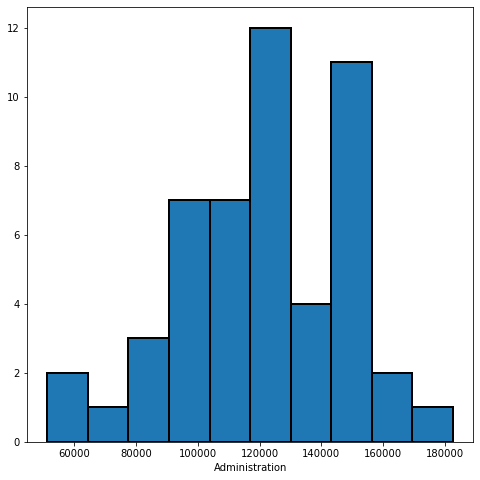

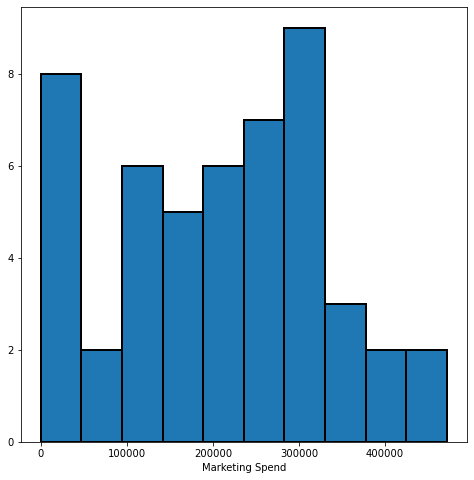

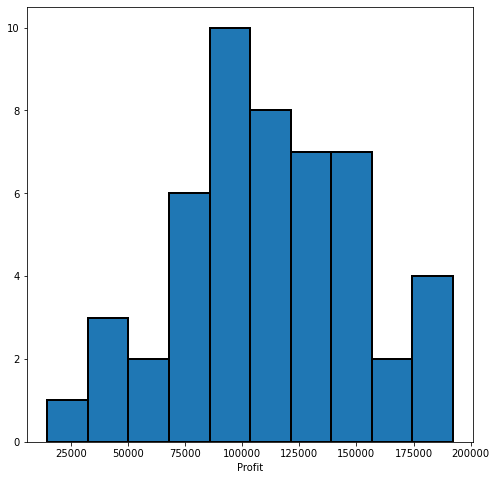

In [17]:
def hist():
    for i in df.select_dtypes(include=['number']):
        plt.figure(figsize=(8,8))
        histo = plt.hist(df[i],linewidth=2,edgecolor='black')
        plt.xlabel(i)
        plt.show()
hist()

In [18]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

<AxesSubplot:xlabel='State', ylabel='count'>

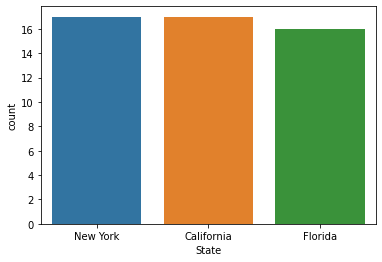

In [21]:
sns.countplot(df['State'])

In [22]:
df = df.drop(['State'],axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


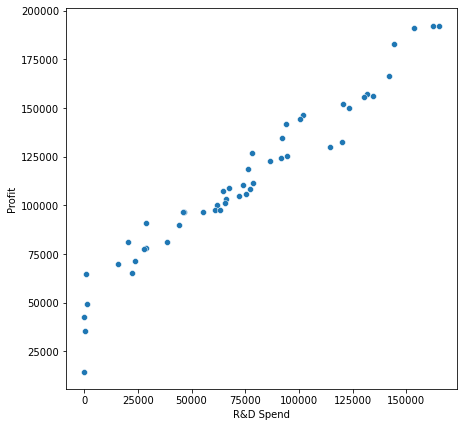

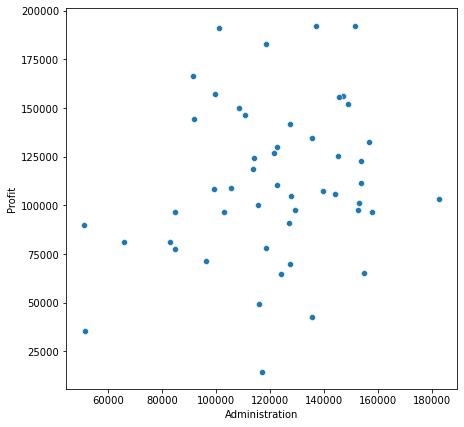

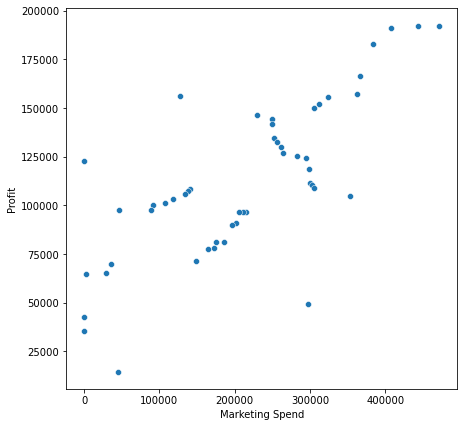

In [27]:
features = df.drop(['Profit'],axis=1)
def scatter():
    for i in features:
        plt.figure(figsize=(7,7))
        p = sns.scatterplot(df[i],df['Profit'])
        plt.show()
scatter()

<Figure size 504x504 with 0 Axes>

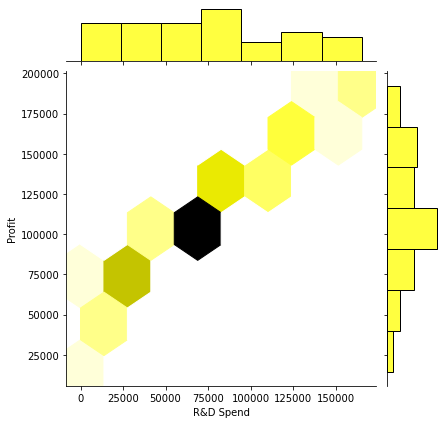

<Figure size 504x504 with 0 Axes>

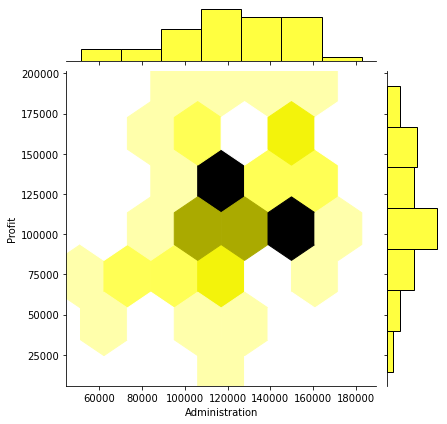

<Figure size 504x504 with 0 Axes>

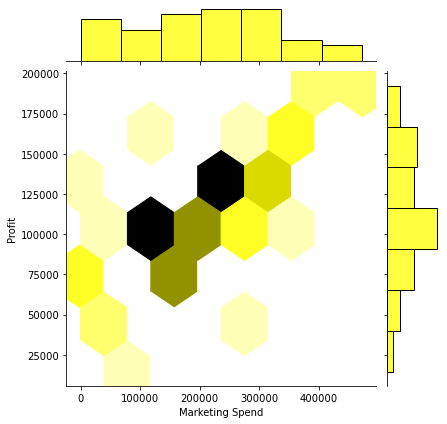

In [30]:
def joint():
    for i in features:
        plt.figure(figsize=(7,7))
        p = sns.jointplot(df[i],df['Profit'],kind='hex',color='yellow')
        plt.show()
joint()

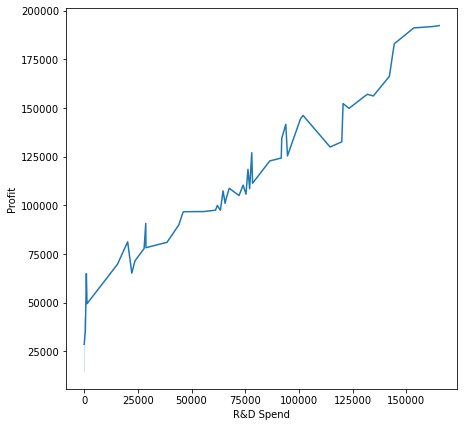

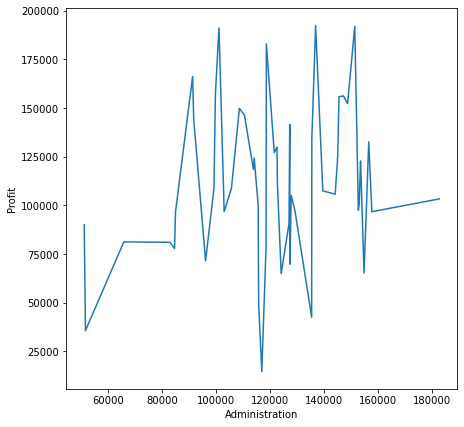

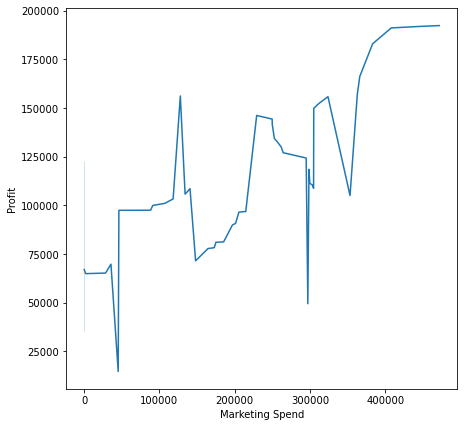

In [31]:
def line():
    for i in features:
        plt.figure(figsize=(7,7))
        p = sns.lineplot(df[i],df['Profit'])
        plt.show()
line()

<Figure size 504x504 with 0 Axes>

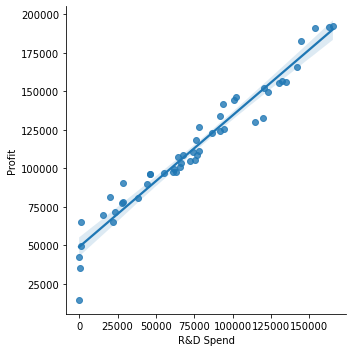

<Figure size 504x504 with 0 Axes>

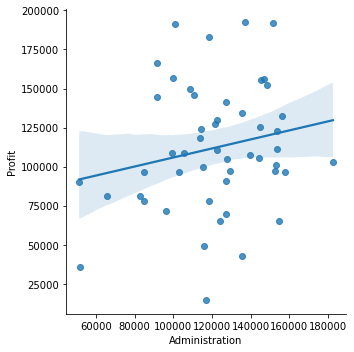

<Figure size 504x504 with 0 Axes>

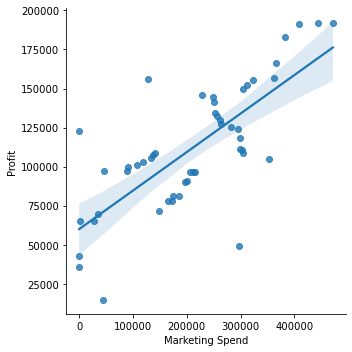

In [36]:
def linear_line():
    for i in features:
        plt.figure(figsize=(7,7))
        p = sns.lmplot(x=i,y='Profit',data=df)
        plt.show()
linear_line()

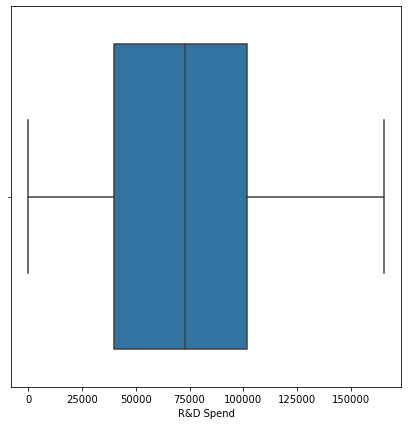

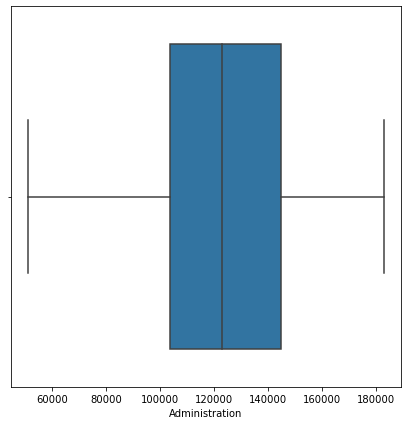

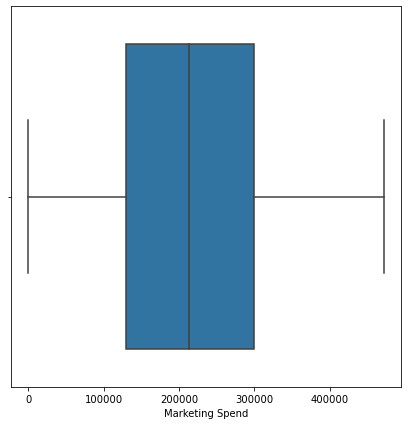

In [41]:
def box():
    for i in features:
        plt.figure(figsize=(7,7))
        p = sns.boxplot(x=i,data=df)
        plt.show()
box()

In [42]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


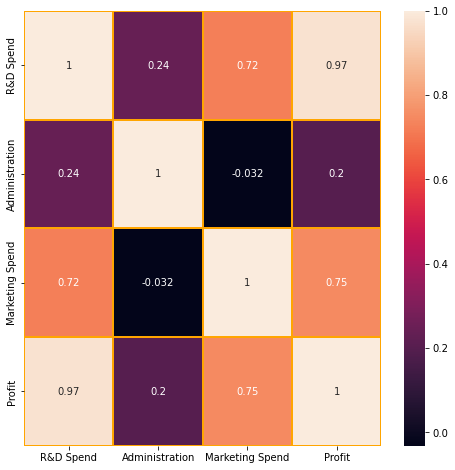

In [43]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,linecolor='orange',linewidths=2)
plt.show()

In [44]:
df.skew()

R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64

In [47]:
X = df.drop(['Profit'],axis=1)
Y = df['Profit']

In [48]:
X.shape

(50, 3)

In [49]:
Y.shape

(50,)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [50]:
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,R&D Spend,Administration,Marketing Spend
0,2.016411,0.560753,2.153943
1,1.955860,1.082807,1.923600
2,1.754364,-0.728257,1.626528
3,1.554784,-0.096365,1.422210
4,1.504937,-1.079919,1.281528
5,1.279800,-0.776239,1.254210
6,1.340066,0.932147,-0.688150
7,1.245057,0.871980,0.932186
8,1.030369,0.986952,0.830887
9,1.091819,-0.456640,0.776107


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35, 3)
(15, 3)
(35,)
(15,)


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [56]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

In [55]:
models = {
    "Logistic Regression"    :  LinearRegression(),
    "K Nearest Neighbor"     :  KNeighborsRegressor(),
    "Support Vector"         :  SVR(),
    "Decision Tree"          :  DecisionTreeRegressor(),
    "Random Forest"          :  RandomForestRegressor(),
    "Gradient Boost"         :  GradientBoostingRegressor(),
}

In [58]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    #Train model
    model.fit(X_train,y_train)

    #Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Training Set Performance
    model_train_accuracy  = r2_score(y_train,y_train_pred)

    #Test Set Performance
    model_test_accuracy  = r2_score(y_test,y_test_pred)
    
    
    print('*'*30)
    print(list(models.keys())[i])
    print('*'*30)

    print('Model Performance for Training Set')
    print('Accuracy Score  : ',model_train_accuracy)

    

    print('Model Performance for Testing Set')
    print('Accuracy Score  : ',model_test_accuracy)

 

    print("Cross-Validation Score")
    print("Cross Val Score : ",cross_val_score(model,X,Y,cv=5).mean()*100)
    
    
    

******************************
Logistic Regression
******************************
Model Performance for Training Set
Accuracy Score  :  0.9515391457049143
Model Performance for Testing Set
Accuracy Score  :  0.9355188337118218
Cross-Validation Score
Cross Val Score :  -12.163534482007313
******************************
K Nearest Neighbor
******************************
Model Performance for Training Set
Accuracy Score  :  0.8719969750093185
Model Performance for Testing Set
Accuracy Score  :  0.8141031215327494
Cross-Validation Score
Cross Val Score :  -433.2751561378676
******************************
Support Vector
******************************
Model Performance for Training Set
Accuracy Score  :  -0.00097789487012645
Model Performance for Testing Set
Accuracy Score  :  -0.057319076720694584
Cross-Validation Score
Cross Val Score :  -1232.1057185080108
******************************
Decision Tree
******************************
Model Performance for Training Set
Accuracy Score  :  1.0
M

In [74]:
for i in range(len(list(models))):
    model_1 = list(models.values())[i]
    
    #Train model
    model.fit(X_train,y_train)

    #Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(list(models.keys())[i])
    print("-"*15)
    
    #mean absolute error
    mae = mean_absolute_error(y_test,y_test_pred)
    print("Mean absolute Error     : ",mae)
    
    #mean squared error
    mse = mean_squared_error(y_test,y_test_pred)
    print("Mean Squared Error      : ",mse)
    
    #root mean squared error
    rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
    print("Root Mean Squared Error : ",rmse)
    
    print("-"*44)

Logistic Regression
---------------
Mean absolute Error     :  7819.866946426849
Mean Squared Error      :  82489905.81960373
Root Mean Squared Error :  9082.395378951729
--------------------------------------------
K Nearest Neighbor
---------------
Mean absolute Error     :  7546.44936100399
Mean Squared Error      :  81804944.49121481
Root Mean Squared Error :  9044.608586954706
--------------------------------------------
Support Vector
---------------
Mean absolute Error     :  7685.119333588741
Mean Squared Error      :  80812210.16769727
Root Mean Squared Error :  8989.561177704798
--------------------------------------------
Decision Tree
---------------
Mean absolute Error     :  7688.510242701581
Mean Squared Error      :  81171985.06735823
Root Mean Squared Error :  9009.549659520071
--------------------------------------------
Random Forest
---------------
Mean absolute Error     :  7741.116771688534
Mean Squared Error      :  81781937.77863207
Root Mean Squared Error :  90

In [78]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)
print(y_lr.flatten())

[104054.44293869 132719.3459701  133640.26830949  72294.76911458
 179685.62227843 114508.97572031  66305.23069863  98297.69326565
 114277.91894933 169112.36095691  96257.40152149  87916.97242208
 110687.33942598  90670.8337806  127780.63539583]
